# EDA

Some descriptives plots using Chetty's data (life expectancy).

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# import plotly.plotly as py
# import plotly.graph_objs as go
import seaborn as sns
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
%matplotlib inline
import itertools

In [2]:
# load data
df = pd.read_csv('../data/le_cov_all.csv')
print(df.shape)

(12000, 63)


In [3]:
len(df.county.unique())

1500

Plots by Gender and Quantile

In [15]:
gender = ['M', 'F']
quartile = ['Q1', 'Q2', 'Q3', 'Q4']
variables = ['gini', 'relative_mob']
comb = list(itertools.product(gender, quartile, variables))

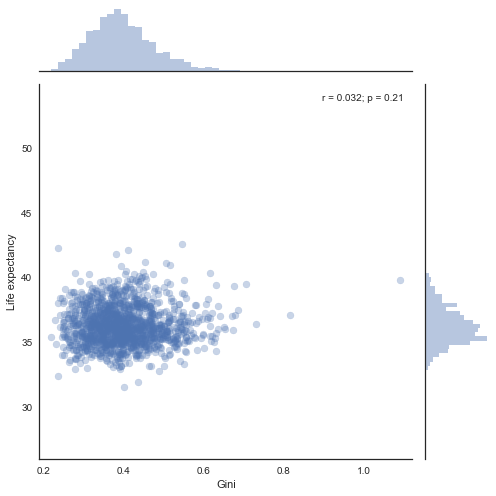

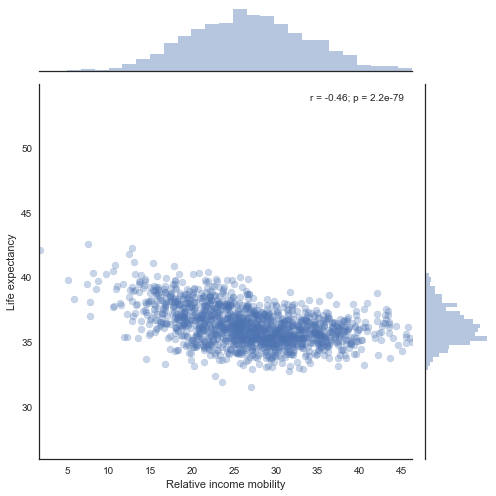

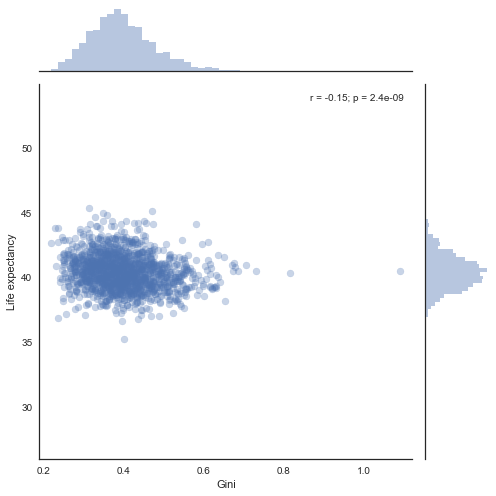

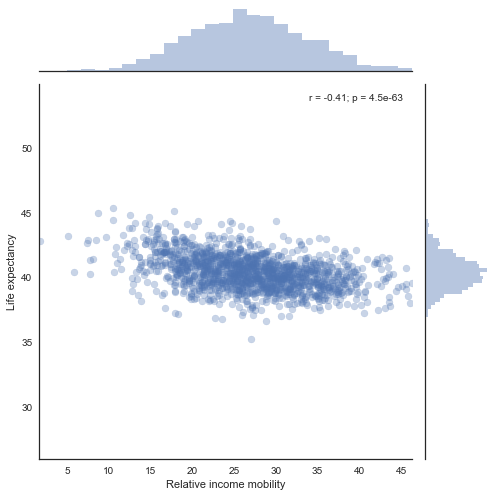

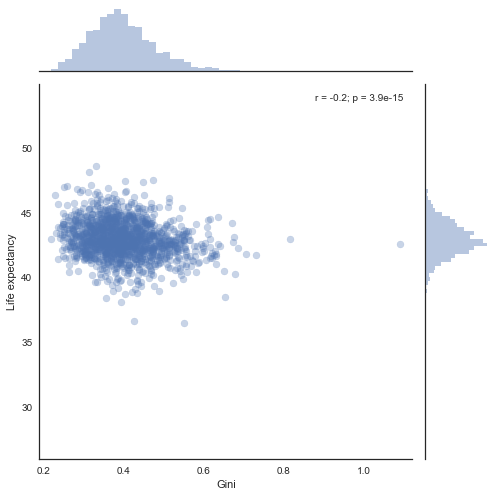

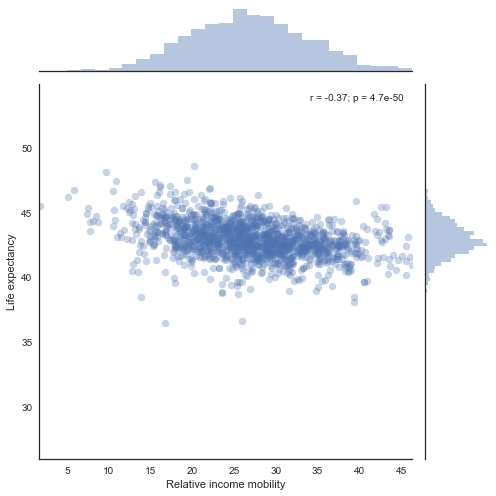

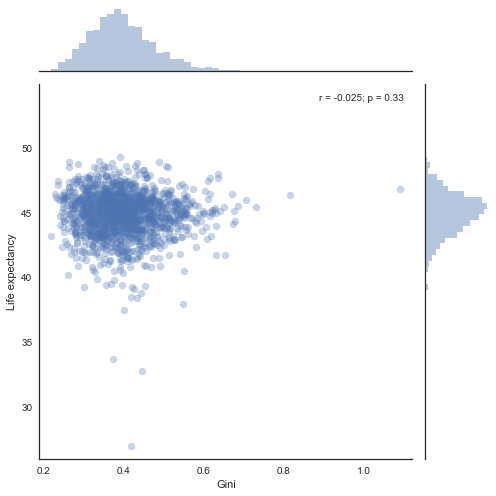

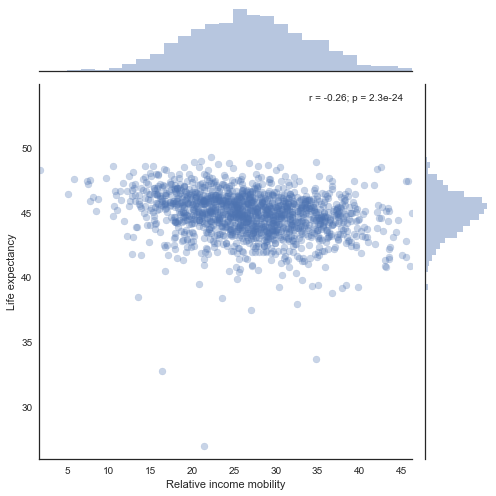

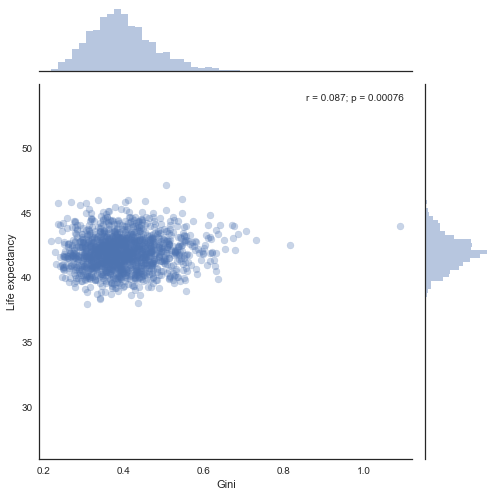

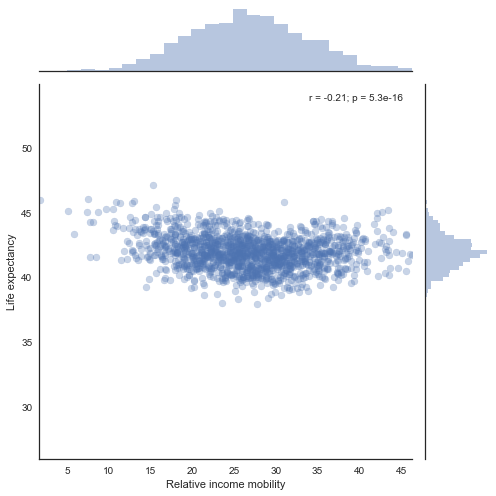

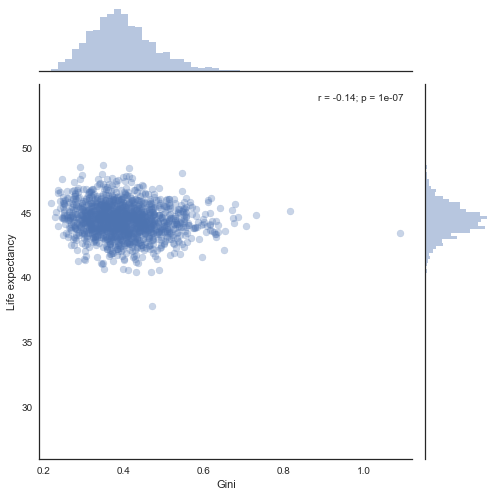

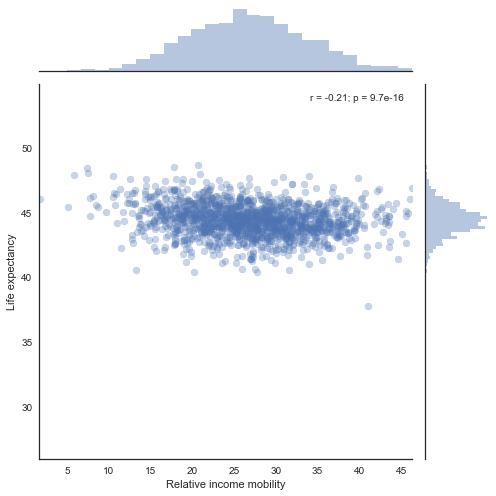

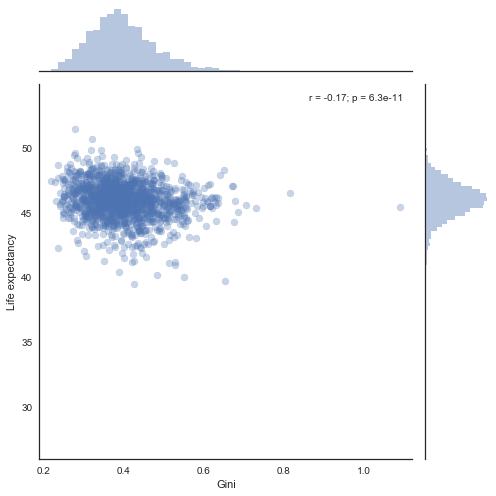

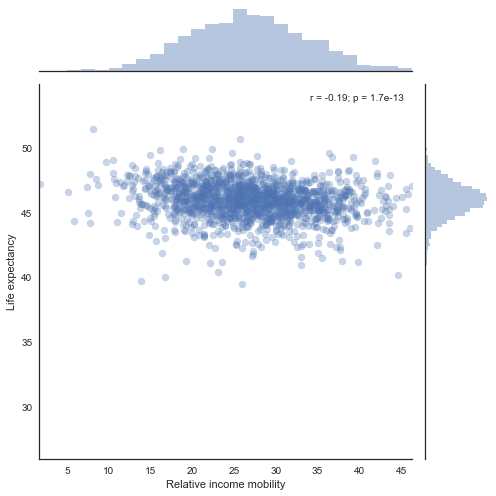

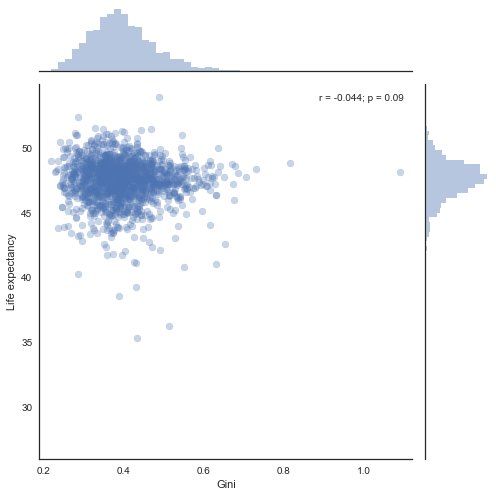

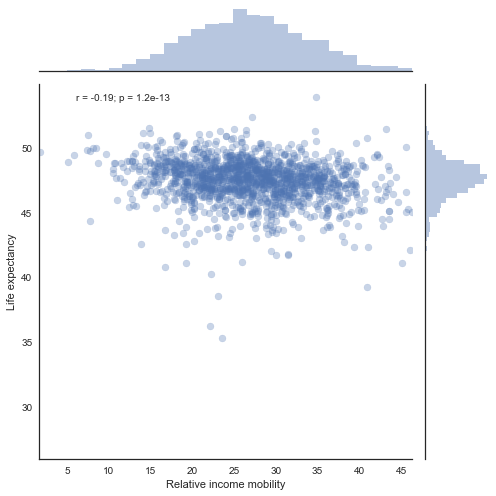

In [16]:
for g,q,v in comb:
    
    map_var = {'gini':'Gini', 'relative_mob':'Relative income mobility'}

    # limits
    le_min_val = df['le'].min() - 1.0
    le_max_val = df['le'].max() + 1.0
    var_min_val = df[v].min() - 0.03
    var_max_val = df[v].max() + 0.03
    
    # select data
    select = (df.gender==g) & (df.income_q==q)
    
    plot = sns.jointplot(v,'le',
                         annot_kws=dict(stat="r"),
                         data=df[select], ratio=5,
                         ylim=(le_min_val,le_max_val), 
                         xlim=(var_min_val,var_max_val), size=7,alpha=0.3)
    plot.set_axis_labels(xlabel=map_var[v], ylabel='Life expectancy');
    plot.savefig('plots/'+v+'_'+g+'_'+q+'.pdf')

# New plots

In [8]:
df.columns

Index(['county', 'gender', 'income_q', 'le', 'county_name', 'population',
       'statename', 'stateabbrv', 'density', 'gini', 'relative_mob',
       'absolute_mob', 'segregation_income', 'segregation_race', 'income',
       'poverty', 'middle_class', 'mig_inflow', 'mig_outflow', 'foreign',
       'religion', 'crime_rate', 'uninsured', 'labor_force', 'unemployment',
       'pct_black', 'pct_hispanic', 'obesity', 'smoking', 'exercise',
       'house_value', 'college', 'medicare_expenses', 'local_gov_exp', 'male',
       'q2', 'q3', 'q4', 'log_population', 'log_crime_rate', 'log_poverty',
       'log_mig_inflow', 'log_mig_outflow', 'log_foreign', 'log_pct_black',
       'log_pct_hispanic', 'log_house_value', 'log_local_gov_exp',
       'log_unemployment', 'log_income', 'z_gini', 'z_relative_mob',
       'z_absolute_mob', 'z_middle_class', 'z_segregation_income',
       'z_religion', 'z_labor_force', 'z_uninsured', 'z_medicare_expenses',
       'z_college', 'z_obesity', 'z_smoking', 'z_ex

In [109]:
v = df.loc[df.income_q.isin(['Q1','Q4']), 'le']
le_lim = np.min(v)-2, np.max(v)+2

v = df.loc[df.income_q.isin(['Q1','Q4']), 'relative_mob']*-1.0
mob_lim = np.min(v)-5, np.max(v)+5

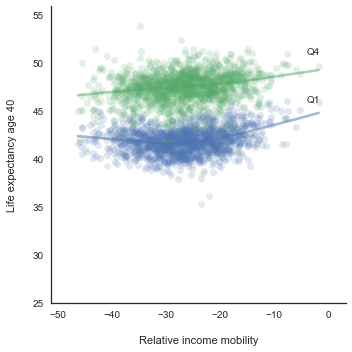

In [120]:
select = (df.gender=='F') & (df.income_q.isin(['Q1','Q4']))
temp = df[select].copy()
temp['relative_mob_n'] = temp['relative_mob'] * -1.0

g = sns.lmplot(x="relative_mob_n", y="le", hue="income_q",
               sharex=False,sharey=False,
               truncate=True, data=temp, lowess=True, 
               scatter_kws={'alpha':0.17}, 
              line_kws={'alpha':0.5}, 
              legend=False)
g.set(ylim=le_lim)
g.set(xlim=mob_lim)
g.set_xlabels('\nRelative income mobility')

g.set_ylabels('Life expectancy age 40\n')
plt.text(-4, 51, 'Q4')
plt.text(-4, 46, 'Q1')
plt.tight_layout()
plt.savefig('plots/scatter_female.pdf')

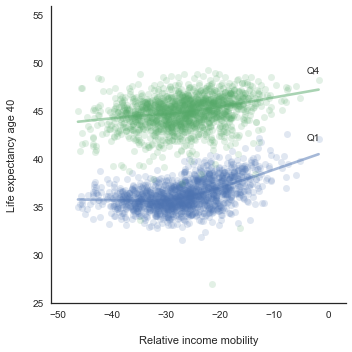

In [121]:
select = (df.gender=='M') & (df.income_q.isin(['Q1','Q4']))
temp = df[select].copy()
temp['relative_mob_n'] = temp['relative_mob'] * -1.0

g = sns.lmplot(x="relative_mob_n", y="le", hue="income_q",
               sharex=False,sharey=False,
               truncate=True, data=temp, lowess=True, 
               scatter_kws={'alpha':0.17}, 
              line_kws={'alpha':0.5}, 
              legend=False)
g.set(ylim=le_lim)
g.set(xlim=mob_lim)
g.set_xlabels('\nRelative income mobility')

g.set_ylabels('Life expectancy age 40\n')
plt.text(-4, 49, 'Q4')
plt.text(-4, 42, 'Q1')
plt.tight_layout()
plt.savefig('plots/scatter_male.pdf')

# Functions for other plots

In [118]:
# def text_counties(df, selection):
#     counties = list(df.loc[selection, 'county_name'].values +  ', '  + df.loc[selection, 'stateabbrv'].values)
#     pop = ['<br/>Population: '+str(p) for p in df.loc[selection, 'population']]
#     return [a + ' ' +  b for a,b in zip(counties, pop)]

In [11]:
# duplicates
# df_counties = df.drop_duplicates(['county', 'gini', 'relative_mob', 'absolute_mob'], keep='last').copy()

In [100]:
# regions = {
#    'Northeast':['Connecticut','Maine' ,'Massachusetts' ,'New Hampshire' ,'Rhode Island' ,'Vermont' ,'New Jersey' ,'New York' ,'Pennsylvania'],
#    'Midwest':['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'], 
#    'South':['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District Of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'], 
#    'West':['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']   
#     }

In [104]:
# map_regions = {}
# for v,k in regions.items():
#     map_regions.update({s:v for s in k})

# df_counties['region'] = df_counties.statename.map(map_regions).values